# US Election 2020 Campaign Plan to Citizens in the Rural, Low-income,  Less Educated Communities 

### Introduction
The US Election of 2016 full of drama as scandals of candidates sprung up countlessly throughout the process and a candidate with no official politial background ultimately got elected as President of the US. The presidential outcome has led a conversation on how polarized the communities are across the country; media often underrepresents groups, such as communities in the rural, low-income areas. To explore which groups exist across the states, I chose this dataset of the US primary results in 2016. 

### Background
I acquired this dataset from Kaggle. It could be accessed here: https://www.kaggle.com/benhamner/2016-us-election/data. 

Initially, the link consists of 3 files: county_facts, county_facts_dictionary, and primary_results.
* *county_facts:* This data file originally consisted of 3195 rows and 54 columns, including demographic information for all counties, states and the US overall. The demographic areas covered were race, education level, income level, etc.
* *county_facts_dictionary:* This was a file complementing the first file. It included all legible names for the columns in county_facts, which were originally written in code. 
* *primary_results:* This file includes rows for all counties across the country with the amount of votes each party candidate received for that county. The original file had 24,611 rows and 8 columns.  

It is important to note here that the US primaries are held independently. The vote is not held on the same date for both parties. Also, some states do not hold primary vote for the Republican nominee for other methods of selecting the nominee. 

### Data Wrangling
There were 4 major steps to wrangle the data from these three datasets to one flat file. 
* **1:** Select only the desired columns from county_facts then rename the columns to a legible format using county_facts_dictionary. 
* **2:** Group county_facts by state level and delete row for US and create a new data frame called state_facts.
* **3:** Merge primary_results data into the state_facts data frame using state.
* **4:** Calculate following metrics from primary_results votes data by party: Democrat_votes, Republican_votes, total_votes, Democrat_fraction, Republican_fraction, voter_turnout, Republican_win, Winning_party, Minority.

### Data Cleaning and Wrangling

In [1]:
# Import Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

In [2]:
# Upload datasets. 
county_facts = pd.read_csv("county_facts.csv")
county_facts_dict = pd.read_csv("county_facts_dictionary.csv")
primary_results = pd.read_csv("primary_results.csv")

In [3]:
# Check primary results dataset.
primary_results.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [4]:
# Check county facts dataset.
county_facts.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [5]:
# Check county facts dictionary dataset.
county_facts_dict.head()

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


In [6]:
# Filter for rows without a state abbreviation and for all row but fips = 0.
county_facts_state = county_facts[(county_facts['state_abbreviation'].isnull()) & (county_facts['fips'] != 0)]

# Allow max columns for all heads.
pd.options.display.max_columns = None

# Check updated county facts by state dataset. 
county_facts_state.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
69,2000,Alaska,NaN,736732,710249,3.7,710231,7.4,25.3,9.4,47.4,66.9,3.9,14.8,6.1,1.3,7.1,6.8,61.9,80.3,7.0,16.2,91.6,27.5,71004,18.8,308583,63.8,24.0,241800,251899,2.75,32651,70760,9.9,20519,266627,3.3,52991,68728,1.5,10.0,3.1,0.3,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2
99,4000,Arizona,NaN,6731484,6392310,5.3,6392017,6.4,24.1,15.9,50.3,83.7,4.7,5.3,3.3,0.3,2.7,30.5,56.2,80.4,13.4,26.8,85.7,26.9,522382,24.6,2909218,64.4,20.7,165100,2370289,2.67,25358,49774,17.9,132762,2173205,1.8,420233,491529,2.0,1.9,3.3,0.0,10.7,28.1,57977827,57573459,86758801,13637,13268514,26997,113594.08,56.3
115,5000,Arkansas,NaN,2966369,2915958,1.7,2915918,6.5,23.8,15.7,50.9,79.7,15.6,1.0,1.5,0.3,1.9,7.0,73.4,83.6,4.5,7.2,83.7,20.1,237311,21.3,1341033,66.7,15.7,107300,1129723,2.53,22170,40768,19.2,64772,978094,0.0,191530,238994,5.5,1.1,1.4,0.1,2.3,24.5,60735582,29659789,32974282,11602,3559795,7666,52035.48,56.0
191,6000,California,NaN,38802500,37254503,4.2,37253956,6.5,23.6,12.9,50.3,73.2,6.5,1.7,14.4,0.5,3.7,38.6,38.5,84.2,27.0,43.7,81.2,30.7,1893539,27.2,13900766,55.3,31.0,366400,12542460,2.94,29527,61094,15.9,874243,13401863,3.5,2983996,3425510,4.0,1.3,14.9,0.3,16.5,30.3,491372092,598456486,455032270,12561,80852787,83645,155779.22,239.1


In [7]:
# Organize county facts data with only the desired columns. 
state_facts = county_facts_state.reset_index()[['fips', 'area_name', 'state_abbreviation', 'PST045214', 'AGE295214', 'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'INC110213', 'PVY020213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207','SBO515207', 'SBO415207', 'SBO015207', 'POP060210']]

# Create new legible names for the columns.
state_facts.columns = ['fips', 'state', 'state_abbreviation', 'Population_2014', '18_and_younger', 'Female', 'White', 'Black','American_Indian_Alaskan_Native', 'Asian', 'Native_Hawaiian_Pacific_Islander', 'Two_or_More_Races','Foreign_born_persons', 'Language_other_than_English_spoken_at_home', 'High_school', 'College', 'Veterans', 'Commute', 'Median_household_income', 'Poverty', 'Total_number_of_firms', 'Black_owned_firms', 'American_Indian_Alaska_Native_owned_firms', 'Asian_owned_firms', 'Native_Hawaiian_and_Other_Pacific_Islander_owned_firms', 'Hispanic_owned_firms', 'Women_owned_firms', 'Population_per_square_mile']

# Check dataset for new county facts.
state_facts.head()

,fips,state,state_abbreviation,Population_2014,18_and_younger,Female,White,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile
0,1000,Alabama,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
1,2000,Alaska,NaN,736732,25.3,47.4,66.9,3.9,14.8,6.1,1.3,7.1,7.0,16.2,91.6,27.5,71004,18.8,70760,9.9,68728,1.5,10.0,3.1,0.3,0.0,25.9,1.2
2,4000,Arizona,NaN,6731484,24.1,50.3,83.7,4.7,5.3,3.3,0.3,2.7,13.4,26.8,85.7,26.9,522382,24.6,49774,17.9,491529,2.0,1.9,3.3,0.0,10.7,28.1,56.3
3,5000,Arkansas,NaN,2966369,23.8,50.9,79.7,15.6,1.0,1.5,0.3,1.9,4.5,7.2,83.7,20.1,237311,21.3,40768,19.2,238994,5.5,1.1,1.4,0.1,2.3,24.5,56.0
4,6000,California,NaN,38802500,23.6,50.3,73.2,6.5,1.7,14.4,0.5,3.7,27.0,43.7,81.2,30.7,1893539,27.2,61094,15.9,3425510,4.0,1.3,14.9,0.3,16.5,30.3,239.1


In [8]:
# Merge primary results and state facts on the same state. 
results_state_facts = pd.merge(primary_results,state_facts, on = ['state'])

# Check dataset. 
results_state_facts.head()

,state,state_abbreviation_x,county,fips_x,party,candidate,votes,fraction_votes,fips_y,state_abbreviation_y,Population_2014,18_and_younger,Female,White,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4


In [9]:
# Create new dataset for just democrat votes.
democrat_states = results_state_facts[results_state_facts['party'] == 'Democrat']

# Check dataset.
democrat_states.head()

,state,state_abbreviation_x,county,fips_x,party,candidate,votes,fraction_votes,fips_y,state_abbreviation_y,Population_2014,18_and_younger,Female,White,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4


In [10]:
# Check shape.
democrat_states.shape

(8959, 35)

In [11]:
# Create new dataset for just republican votes.
republican_states = results_state_facts[results_state_facts['party'] == 'Republican']

# Check dataset.
republican_states.head()

,state,state_abbreviation_x,county,fips_x,party,candidate,votes,fraction_votes,fips_y,state_abbreviation_y,Population_2014,18_and_younger,Female,White,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile
134,Alabama,AL,Autauga,1001.0,Republican,Ben Carson,1764,0.146,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
135,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
136,Alabama,AL,Autauga,1001.0,Republican,John Kasich,421,0.035,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
137,Alabama,AL,Autauga,1001.0,Republican,Marco Rubio,1785,0.148,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
138,Alabama,AL,Autauga,1001.0,Republican,Ted Cruz,2482,0.205,1000,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4


In [12]:
# Check shape.
republican_states.shape

(15652, 35)

In [13]:
# Groupby sum of votes for each state in democrat states.
democrat_states_sum = democrat_states.groupby(['state'])['votes'].sum().reset_index()

# Rename columns.
democrat_states_sum.columns = ['state', 'democrat_votes']

# Check dataset.
democrat_states_sum.head()

,state,democrat_votes
0,Alabama,386327
1,Alaska,539
2,Arizona,399097
3,Arkansas,209448
4,California,3442623


In [14]:
# Groupby sum of votes for each Republican states.
republican_states_sum = republican_states.groupby(['state'])['votes'].sum().reset_index()

# Rename columns.
republican_states_sum.columns = ['state', 'republican_votes']

# Check dataset.
republican_states_sum.head()

,state,republican_votes
0,Alabama,837632
1,Alaska,21930
2,Arizona,435103
3,Arkansas,396523
4,California,1495574


In [15]:
# Merge the two datasets to add democrat and republican votes to each state. Join on 'state'.
state_votes = pd.merge(democrat_states_sum, republican_states_sum, on = 'state')

# Calculate new metrics using the newly organized columns.
state_votes['total_votes'] = state_votes['democrat_votes'] + state_votes['republican_votes']
state_votes['democrat_fraction'] = state_votes['democrat_votes'] / state_votes['total_votes'] *100
state_votes['republican_fraction'] = state_votes['republican_votes'] / state_votes['total_votes'] *100

# Check dataset.
state_votes.head()

,state,democrat_votes,republican_votes,total_votes,democrat_fraction,republican_fraction
0,Alabama,386327,837632,1223959,31.563721,68.436279
1,Alaska,539,21930,22469,2.398861,97.601139
2,Arizona,399097,435103,834200,47.841884,52.158116
3,Arkansas,209448,396523,605971,34.564030,65.435970
4,California,3442623,1495574,4938197,69.714169,30.285831


In [16]:
# Define party_win function to identify winning party.
def party_win(x):
    if x == True: 
        return 'Republican'
    else:
        return 'Democrat'

In [17]:
# Merge new dataset with primary results, by state.
state_facts_votes = pd.merge(state_facts, state_votes, on = 'state')

# Create final columns.
state_facts_votes['voter_turnout'] = state_facts_votes['total_votes'] / state_facts_votes['Population_2014'] *100
state_facts_votes['Minority'] = state_facts_votes['Black'] + state_facts_votes['American_Indian_Alaskan_Native'] + state_facts_votes['Asian'] + state_facts_votes['Native_Hawaiian_Pacific_Islander'] + state_facts_votes['Two_or_More_Races']
state_facts_votes['Republican_win'] = state_facts_votes['republican_fraction'] > 50
state_facts_votes['Winning_party'] = state_facts_votes['Republican_win'].apply(party_win)

# Check dataset.
state_facts_votes.head()

,fips,state,state_abbreviation,Population_2014,18_and_younger,Female,White,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,democrat_votes,republican_votes,total_votes,democrat_fraction,republican_fraction,voter_turnout,Minority,Republican_win,Winning_party
0,1000,Alabama,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4,386327,837632,1223959,31.563721,68.436279,25.239510,30.3,True,Republican
1,2000,Alaska,NaN,736732,25.3,47.4,66.9,3.9,14.8,6.1,1.3,7.1,7.0,16.2,91.6,27.5,71004,18.8,70760,9.9,68728,1.5,10.0,3.1,0.3,0.0,25.9,1.2,539,21930,22469,2.398861,97.601139,3.049820,33.2,True,Republican
2,4000,Arizona,NaN,6731484,24.1,50.3,83.7,4.7,5.3,3.3,0.3,2.7,13.4,26.8,85.7,26.9,522382,24.6,49774,17.9,491529,2.0,1.9,3.3,0.0,10.7,28.1,56.3,399097,435103,834200,47.841884,52.158116,12.392513,16.3,True,Republican
3,5000,Arkansas,NaN,2966369,23.8,50.9,79.7,15.6,1.0,1.5,0.3,1.9,4.5,7.2,83.7,20.1,237311,21.3,40768,19.2,238994,5.5,1.1,1.4,0.1,2.3,24.5,56.0,209448,396523,605971,34.564030,65.435970,20.428038,20.3,True,Republican
4,6000,California,NaN,38802500,23.6,50.3,73.2,6.5,1.7,14.4,0.5,3.7,27.0,43.7,81.2,30.7,1893539,27.2,61094,15.9,3425510,4.0,1.3,14.9,0.3,16.5,30.3,239.1,3442623,1495574,4938197,69.714169,30.285831,12.726492,26.8,False,Democrat


In [18]:
# Check shape.
state_facts_votes.shape

(46, 37)

### Exploratory Data Analysis
In this section, we will explore the fields that will set the basis for our experimental design. First, I will introduce a few plots to provide a base understanding of the data. Then, I will compare how the following area differ between parties: education level, population density, poverty and median income level.

### **Base Analysis**
The areas I will cover in this section are overall population, median household income, poverty and college education.

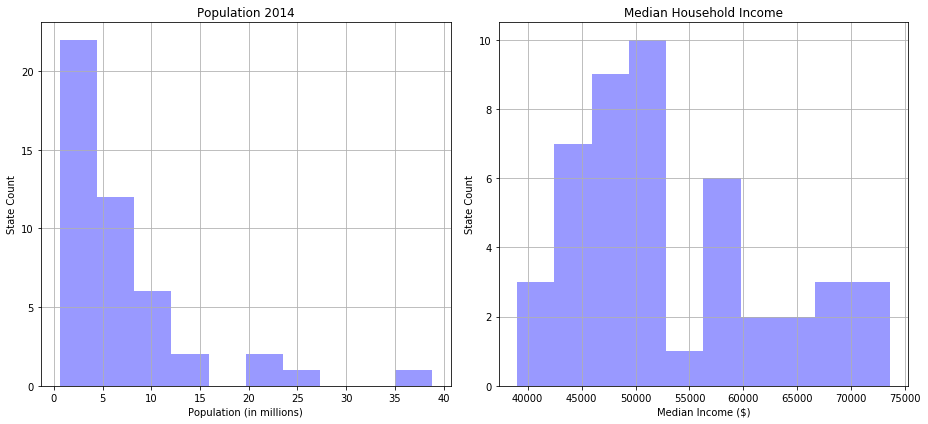

In [19]:
# Set the dimensions for the chart.
plt.figure(figsize=(13, 6))

# Create histogram for overall population.
plt.subplot(1, 2, 1)
#sns.distplot(state_facts_votes['Population_2014']);
plt.hist(x=state_facts_votes['Population_2014']/1000000, color='blue', alpha=.4)
plt.title('Population 2014')
plt.ylabel('State Count')
plt.xlabel('Population (in millions)')
plt.grid()

# Create histogram for overall median household income. 
plt.subplot(1, 2, 2)
plt.hist(x=state_facts_votes['Median_household_income'], color= 'blue', alpha=.4)
plt.title('Median Household Income')
plt.ylabel('State Count')
plt.xlabel('Median Income ($)')
plt.grid()

# Print the scatter plots. 
plt.tight_layout()
plt.show()

In [20]:
# Check calculations in the next few cells.
Republican = sum(state_facts_votes['republican_votes'])
Republican

29098686

In [21]:
Democrat = sum(state_facts_votes['democrat_votes'])
Democrat

27535548

In [22]:
sum(state_facts_votes['total_votes'])

56634234

In [23]:
Republican + Democrat 

56634234

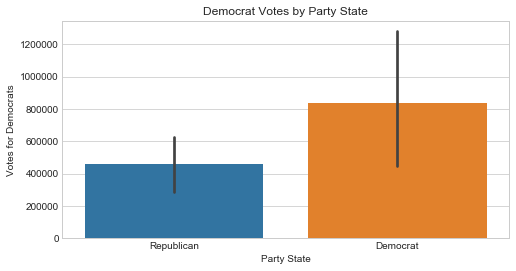

In [24]:
plt.figure(figsize=(8, 4))

sns.set_style("whitegrid")
sns.barplot(x='Winning_party', y='democrat_votes', data=state_facts_votes);

plt.title('Democrat Votes by Party State')
plt.xlabel('Party State')
plt.ylabel('Votes for Democrats')
plt.show()

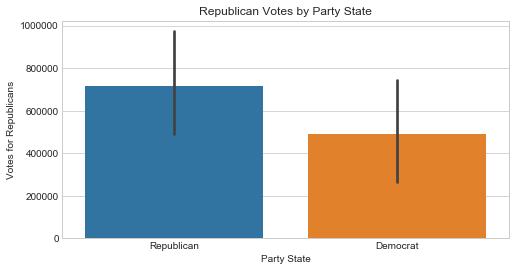

In [25]:
plt.figure(figsize=(8, 4))

sns.set_style("whitegrid")
sns.barplot(x='Winning_party', y='republican_votes', data=state_facts_votes);

plt.title('Republican Votes by Party State')
plt.xlabel('Party State')
plt.ylabel('Votes for Republicans')
plt.show()

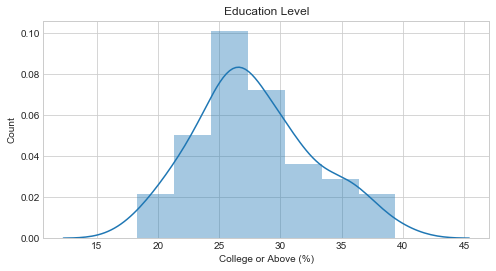

In [26]:
plt.figure(figsize=(8, 4))

sns.distplot(state_facts_votes['College']);

plt.title('Education Level')
plt.xlabel('College or Above (%)')
plt.ylabel('Count')
plt.show()

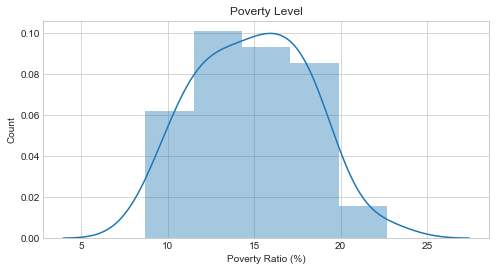

In [27]:
plt.figure(figsize=(8, 4))

sns.distplot(state_facts_votes['Poverty']);

plt.title('Poverty Level')
plt.xlabel('Poverty Ratio (%)')
plt.ylabel('Count')
plt.show()

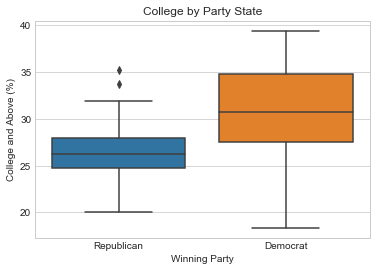

In [28]:
# Create boxplot of poverty rates by party.
sns.boxplot(x="Winning_party", y="College", data=state_facts_votes);

plt.title('College by Party State')
plt.ylabel('College and Above (%)')
plt.xlabel('Winning Party')
plt.show()

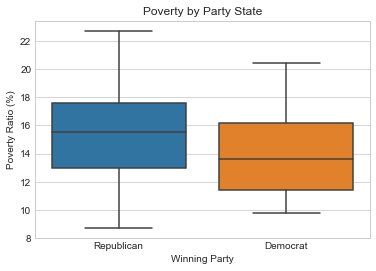

In [29]:
# Create boxplot of poverty rates by party.
sns.boxplot(x="Winning_party", y="Poverty", data=state_facts_votes);

plt.title('Poverty by Party State')
plt.ylabel('Poverty Ratio (%)')
plt.xlabel('Winning Party')
plt.show()

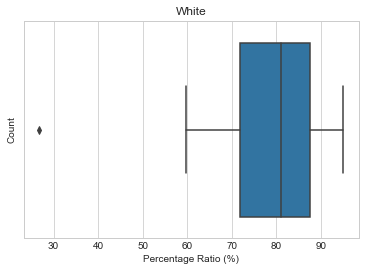

In [30]:
# Create boxplot of poverty rates by party.
sns.boxplot(x=state_facts_votes["White"]);

plt.title('White')
plt.xlabel('Percentage Ratio (%)')
plt.ylabel('Count')
plt.show()

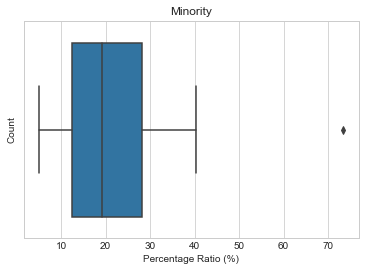

In [31]:
# Create boxplot of poverty rates by party.
sns.boxplot(x=state_facts_votes["Minority"]);

plt.title('Minority')
plt.xlabel('Percentage Ratio (%)')
plt.ylabel('Count')
plt.show()

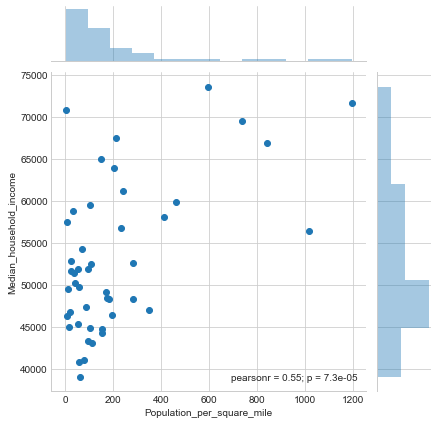

In [32]:
sns.jointplot(x="Population_per_square_mile", y="Median_household_income", data=state_facts_votes);

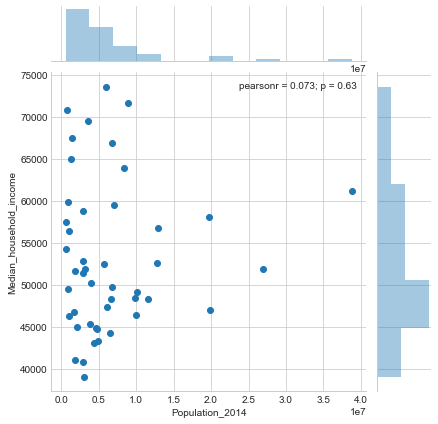

In [33]:
sns.jointplot(x="Population_2014", y="Median_household_income", data=state_facts_votes);

### **Education**

In [34]:
# Create new dataset for just democrat votes.
democrat_states = state_facts_votes[state_facts_votes['Republican_win'] == False]

# Check dataset.
democrat_states.head()

,fips,state,state_abbreviation,Population_2014,18_and_younger,Female,White,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,democrat_votes,republican_votes,total_votes,democrat_fraction,republican_fraction,voter_turnout,Minority,Republican_win,Winning_party
4,6000,California,NaN,38802500,23.6,50.3,73.2,6.5,1.7,14.4,0.5,3.7,27.0,43.7,81.2,30.7,1893539,27.2,61094,15.9,3425510,4.0,1.3,14.9,0.3,16.5,30.3,239.1,3442623,1495574,4938197,69.714169,30.285831,12.726492,26.8,False,Democrat
5,9000,Connecticut,NaN,3596677,21.6,51.2,81.2,11.5,0.5,4.5,0.1,2.2,13.6,21.5,89.2,36.5,217947,24.8,69461,10.2,332150,4.4,0.5,3.3,0.0,4.2,28.1,738.1,322485,208817,531302,60.697118,39.302882,14.772024,18.8,False,Democrat
6,10000,Delaware,NaN,935614,21.8,51.6,70.8,22.2,0.7,3.8,0.1,2.5,8.4,12.6,87.7,28.9,75081,24.8,59878,11.7,74573,8.7,0.0,4.0,0.0,2.1,26.1,460.8,92609,67807,160416,57.730526,42.269474,17.145532,29.3,False,Democrat
9,15000,Hawaii,NaN,1419561,21.7,49.4,26.7,2.5,0.4,37.5,10.0,23.0,17.9,25.4,90.4,30.1,112625,26.0,67402,11.2,120374,0.9,1.3,47.2,9.5,3.6,31.0,211.8,33658,13228,46886,71.786887,28.213113,3.302852,73.4,False,Democrat
11,17000,Illinois,NaN,12880580,23.2,50.9,77.5,14.7,0.6,5.3,0.1,1.8,13.8,22.3,87.3,31.4,727919,28.0,56797,14.1,1123817,9.5,0.5,5.3,0.1,5.0,30.5,231.1,1987834,1384703,3372537,58.941800,41.058200,26.183114,22.5,False,Democrat


In [35]:
# Create new dataset for just democrat votes.
republican_states = state_facts_votes[state_facts_votes['Republican_win'] == True]

# Check dataset.
republican_states.head()

,fips,state,state_abbreviation,Population_2014,18_and_younger,Female,White,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,democrat_votes,republican_votes,total_votes,democrat_fraction,republican_fraction,voter_turnout,Minority,Republican_win,Winning_party
0,1000,Alabama,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4,386327,837632,1223959,31.563721,68.436279,25.239510,30.3,True,Republican
1,2000,Alaska,NaN,736732,25.3,47.4,66.9,3.9,14.8,6.1,1.3,7.1,7.0,16.2,91.6,27.5,71004,18.8,70760,9.9,68728,1.5,10.0,3.1,0.3,0.0,25.9,1.2,539,21930,22469,2.398861,97.601139,3.049820,33.2,True,Republican
2,4000,Arizona,NaN,6731484,24.1,50.3,83.7,4.7,5.3,3.3,0.3,2.7,13.4,26.8,85.7,26.9,522382,24.6,49774,17.9,491529,2.0,1.9,3.3,0.0,10.7,28.1,56.3,399097,435103,834200,47.841884,52.158116,12.392513,16.3,True,Republican
3,5000,Arkansas,NaN,2966369,23.8,50.9,79.7,15.6,1.0,1.5,0.3,1.9,4.5,7.2,83.7,20.1,237311,21.3,40768,19.2,238994,5.5,1.1,1.4,0.1,2.3,24.5,56.0,209448,396523,605971,34.564030,65.435970,20.428038,20.3,True,Republican
7,12000,Florida,NaN,19893297,20.4,51.1,77.8,16.8,0.5,2.8,0.1,2.0,19.4,27.4,86.1,26.4,1569406,25.9,46956,16.3,2009589,9.0,0.5,3.2,0.1,22.4,28.9,350.6,1664003,2276926,3940929,42.223623,57.776377,19.810336,22.2,True,Republican


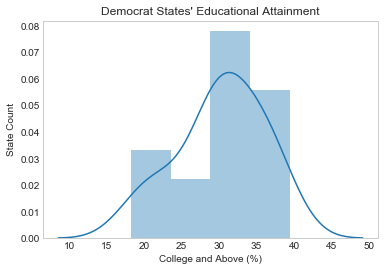

In [36]:
# See the distribution of college level graduates and above in democrat states.
sns.distplot(democrat_states['College']);

plt.title('Democrat States\' Educational Attainment')
plt.xlabel('College and Above (%)')
plt.ylabel('State Count')
plt.grid()
plt.show()

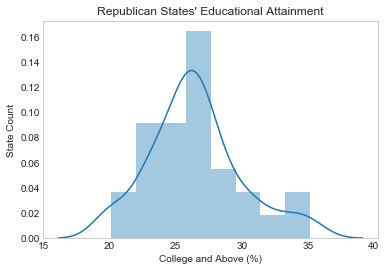

In [37]:
# See the distribution of college graduates and above in republican states.
sns.distplot(republican_states['College']);

plt.title('Republican States\' Educational Attainment')
plt.xlabel('College and Above (%)')
plt.ylabel('State Count')
plt.grid()
plt.show()

Education level is higher in democrat states than republican states. In democrat states, about 27%-35% of individuals, 25 years and olders, attained a college degree. Whereas, for republican states, the same was true for only 25%-28%. 

There are 12 republican states where republicans won 60% or less of the votes. These 12 states may be the samples for our experimental design. 

### **Rural vs. Urban**

Population_per_square_mile is used here as a measure of population density. The thought process I used was the higher the density the population, the more urban; the less dense, the more rural.

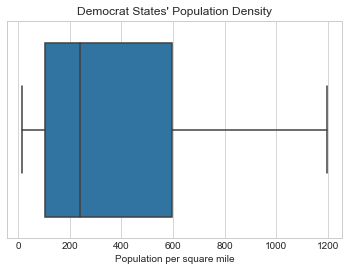

In [38]:
# View of democrat states' population density.
sns.boxplot(democrat_states['Population_per_square_mile']);

plt.title('Democrat States\' Population Density')
plt.xlabel('Population per square mile')
plt.show()

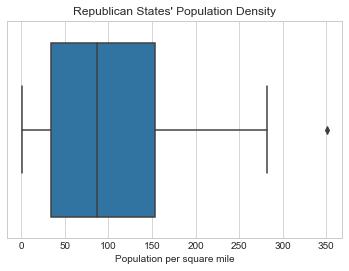

In [39]:
# View of republican states' population density.
sns.boxplot(republican_states['Population_per_square_mile']);

plt.title('Republican States\' Population Density')
plt.xlabel('Population per square mile')
plt.show()

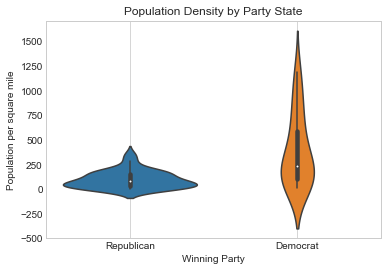

In [40]:
# Comparison view of population density by party.
sns.violinplot(x="Winning_party", y="Population_per_square_mile", data=state_facts_votes);

plt.title('Population Density by Party State')
plt.ylabel('Population per square mile')
plt.xlabel('Winning Party')
plt.grid()
plt.show()

In [41]:
# Summary statistics for population density of democrat states.
democrat_states['Population_per_square_mile'].describe().reset_index()

,index,Population_per_square_mile
0,count,17.000000
1,mean,390.617647
2,std,364.691375
3,min,17.000000
4,25%,104.900000
5,50%,239.100000
6,75%,594.800000
7,max,1195.500000


In [42]:
# Summary statistics of population density of republican states.
republican_states['Population_per_square_mile'].describe().reset_index()

,index,Population_per_square_mile
0,count,29.000000
1,mean,101.368966
2,std,87.044907
3,min,1.200000
4,25%,33.600000
5,50%,87.100000
6,75%,153.900000
7,max,350.600000


In [43]:
# Sort by voter turnout and list education level to see which states are on the middle 
republican_states_popdensity_sort = republican_states[['state', 'Population_per_square_mile', 'voter_turnout']].sort_values('Population_per_square_mile', ascending = True)
republican_states_popdensity_sort.head()

,state,Population_per_square_mile,voter_turnout
1,Alaska,1.2,3.049820
45,Wyoming,5.8,0.202515
22,Montana,6.8,25.158390
36,South Dakota,10.7,14.051162
10,Idaho,19.0,14.621858


Republican states are more rural than democrat states. Population per squre mile is approximately 33 to 154 people in republican states, whereas, it is approximately 105 to 595 people in democrat states. The mean population density for republican and democrat states are 101 and 390, respectively. 

Rural republican states, states with low population density, will also be an area of focus for the experimental design.

### **Social Economic Status**

We will explore how poverty and median household income varies by party.

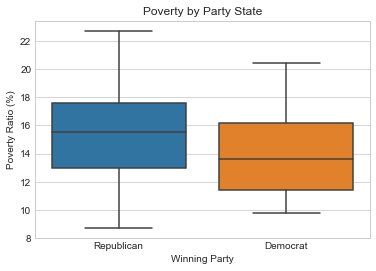

In [44]:
# Create boxplot of poverty rates by party.
sns.boxplot(x="Winning_party", y="Poverty", data=state_facts_votes);

plt.title('Poverty by Party State')
plt.ylabel('Poverty Ratio (%)')
plt.xlabel('Winning Party')
plt.show()

Republican more povertized than democrat.

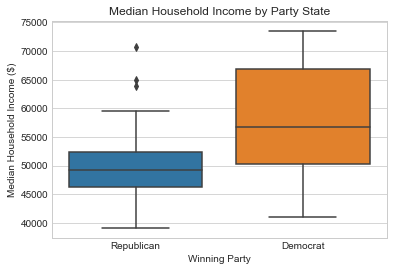

In [45]:
# Create boxplot of median household income by party.
sns.boxplot(x="Winning_party", y="Median_household_income", data=state_facts_votes);

plt.title('Median Household Income by Party State')
plt.ylabel('Median Household Income ($)')
plt.xlabel('Winning Party')
plt.show()

In democrat states, people have a higher median household income compared to republican states. This makes sense with our findings of democrat states being more urban than rural; and cities typically pay higher salaries than remote locations in the US.

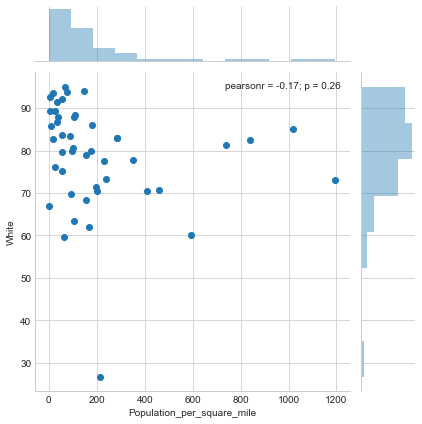

In [46]:
# Explore relationship between pop density and Whites.
sns.jointplot(x="Population_per_square_mile", y="White", data=state_facts_votes);

Overall, across the US, Whites are more represented in rural areas. Whites may be the primary community of focus for our experimental design.

### Preliminary Conclusions from Findings

From our findings, we have discovered republican states have lower educational attainment, live is rural areas and have lower social economic status. Also, white communities may be the focus of our treatment if this group is most represented in rural areas. 

As a results, for our experiment strategy, we should narrow our focus to white, rural communities who experience low-income levels. The sample states for our experiment design should have the following critera:
* Predominantly white
* Very rural (i.e. low population density)
* Primary result was very close (more on this in experimental design section)

Based on these criteria, the two states we will choose for our sample are Montana and South Dakota.

In [47]:
# View facts for Montana.
Montana = state_facts_votes[(state_facts_votes['state'] == 'Montana')]
Montana

,fips,state,state_abbreviation,Population_2014,18_and_younger,Female,White,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,democrat_votes,republican_votes,total_votes,democrat_fraction,republican_fraction,voter_turnout,Minority,Republican_win,Winning_party
22,30000,Montana,NaN,1023579,22.0,49.8,89.4,0.6,6.6,0.8,0.1,2.6,2.0,4.4,92.1,28.7,94404,18.0,46230,15.2,114398,0.2,2.0,0.6,0.0,1.0,24.6,6.8,118362,139154,257516,45.962969,54.037031,25.15839,10.7,True,Republican


**Base Criteria**
* Predominantly White: Montana (89%)
* Very Rural: Montana ranks in bottom four states for population density
* Primary results very close, with Republicans edging out win: Republican votes out of total votes for Montana (54%) 

*Other facts*
* College or above: Montana (29%)
* Poverty: Montana (15%)
* Median household income: Montana (\$46,230)

## Experimental Design

Using our findings from above, I will now present an experimental design using the following structure:
* Problem statement, solution, hypothesis
* Rollout Plan: control and treatment group, treatment, check-ins
* Outcomes of Success: primary measures, secondary measures, method
* Evaluation Plan

### *Context*
First it is important to note that Montana and South Dakota are primarily agricultural states, with natural resources (i.e. coal, goal, silver) making up most of the states' economy. Workers in these environments are typically hourly. 

### 1) Problem
Democratic candidates are losing. They are not reaching the white, rural, low-income communities and are not winning the votes of the members in those communities.

### 2) Solution
Send email campaign to members in white, rural, low-income communities about increased wages, better work conditions for hourly workers and favorable legislation for farmers. Cater to the needs of the members in those communities.

### 3) Hypothesis
By sending email campaigns catering to the needs of the white, rural, low-income communities, email sign-ups for the Democratic candidate will increase and in the long-term, will lead to **more votes** compared to control group. 

### *Rollout Plan*

* *Treatment:* Email campaign with increased wages, better work conditions for hourly workers, and favorable legislation for farmers. Control group will just have a standard candidate info email. 
* *Random Sampling:* Choose number of counties equalling to 10,000 in population. Set the same amount of counties with similar demographics and randomly assign individuals into Group A or Group B.
* *Treatment Group:* Group A in Montana
* *Control Group:* Group B in Montana


### *Outcomes of Success*

* *Method:* Email delivery every two months for half a year. Continue adjusted rollout for 3 more rounds of 6-month period experiments. Total duration of study is two years. 
* ***Primary Measures: Votes***
* *Secondary Measures:* Email opened, website click, candidate support sign-ups, candidate pledge amount

### Evaluation Plan

* **1) Email engagement:** After delivering the email, we will wait two months to see how the groups respond. We will wait two months instead of one because it may take time for receipients to respond to an email. We expect there to be an influx of email signups for the treatment group initially. Then after a week, there may be more. We will have this check-in 3 times, and the initial experimental period will last 6 months. Then, reiterate and repeat this cycle three more times for a total experiment duration of two years.

* **2) Support sign-ups and Pledges:** While we will not be able to measure votes because the election is not held every year, by encouraging support sign-ups and pledges, this will help us track how many people in the state has allegiance to the party and help us get an idea of how many people are planning vote. This measure can be compared to the amount of votes received for the party in the previous election as a benchmark. 

* **3) Comparison Polls:** Take sentiment poll every 8 months to gauge support for each candidate. If percentage of Democrat supporters are greater than Republican supporters in Montana then mark as successful for that period. 

### Appendix

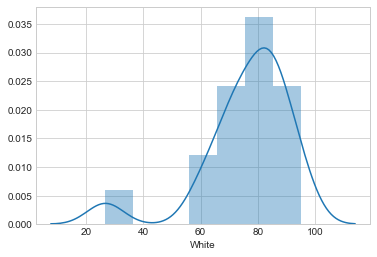

In [48]:
sns.distplot(democrat_states['White']);

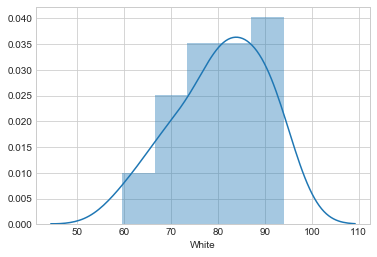

In [49]:
sns.distplot(republican_states['White']);

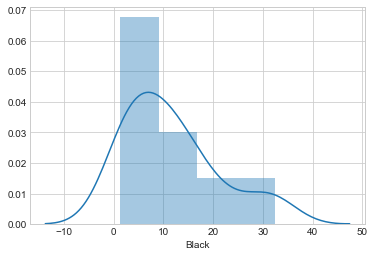

In [50]:
sns.distplot(democrat_states['Black']);

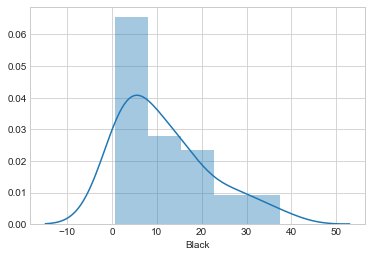

In [51]:
sns.distplot(republican_states['Black']);

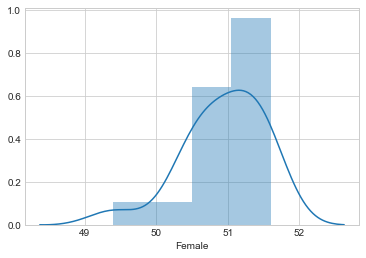

In [52]:
sns.distplot(democrat_states['Female']);

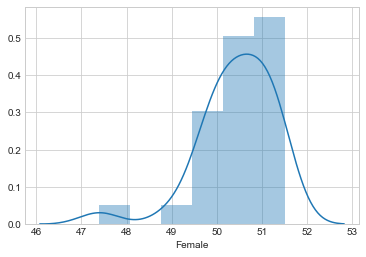

In [53]:
sns.distplot(republican_states['Female']);

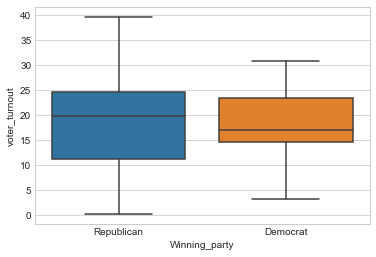

In [54]:
# See voter turnout.
sns.boxplot(x="Winning_party", y='voter_turnout', data=state_facts_votes);